In [10]:
from keras.models import load_model
from keras.preprocessing import image
from matplotlib.pyplot import imshow
import numpy as np
%matplotlib inline

In [11]:
def getSingleFEN(yhat):
    
    m={
    0 : "0", #No Piece
    1 : "P", #White Pawn
    2 : "B", #White Bishop
    3 : "R", #White Rook
    4 : "N", #White Knight
    5 : "K", #White King
    6 : "Q", #White Queen
    7 : "p", #Black pawn
    8 : "b", #Black bishop 
    9 : "r", #Black rook
    10 : "n", #Black Knight
    11 : "k", #Black King
    12 : "q"  #Black Queen
    } 
    
    a =[]
    digit =0
    for i in range(8):
        for j in range(8):
            res = m[yhat[8*i +j]]
            if res != "0":
                if digit > 0:
                    a.append(str(digit))
                    digit=0
                a.append(res) 
            else:
                digit += 1
        if digit > 0:
            a.append(str(digit))
            digit=0
        a.append("-")         
    
    
    return "".join(a[:-1]) 

In [12]:
def loss(y_true, y_pred): 
    
    """
    100000 images of a randomly generated chess positions of 5-15 pieces (2 kings and 3-13 pawns/pieces)
    Pieces were generated with the following probability distribution:

    30% for Pawn
    20% for Bishop
    20% for Knight
    20% for Rook
    10% for Queen

    2 Kings are guaranteed to be on the board.
    """
    
    #The inverse of expectation : assuming average 10 pieces on an image
    weights = [1/(64-10),
               1/(4*0.3),
               1/(4*0.2),
               1/(4*0.2),
               1/(4*0.2),
               1,
               1/(4*0.1),
               1/(4*0.3),
               1/(4*0.2),              
               1/(4*0.2),
               1/(4*0.2),
               1,
               1/(4*0.1)]
   
    loss = y_true * K.log(y_pred) * weights
    loss = -K.sum(loss, -1)
    return loss

In [13]:
def predictAndDisplaySingleNewImage(img_path,model):
    
    img = image.load_img(img_path,target_size =(400,400))
    x = np.array(img)
    x = np.expand_dims(x, axis=0)
    x = x/255.
    
    p = model.predict(x)

    yhat = []
    for i in range(8):
        for j in range(8):
            yhat.append(np.argmax(p[0,i,j,:]))            
            
    print(getSingleFEN(yhat)) 
    imshow(img)

K6k-8-3p4-8-8-2R5-3p4-3b4


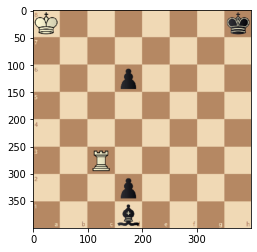

In [14]:
imgPath = 'images/predictImage1.jpeg'
modelName = "my_chess_model6"
model = load_model(modelName,custom_objects={'loss': loss})
predictAndDisplaySingleNewImage(imgPath,model)